# HR - Attrition Analytics

In [1]:
#Human Resources are critical resources of any organiazation. Organizations spend huge amount 
#of time and money to hire and nuture their employees. It is a huge loss for companies if employees 
#leave, especially the key resources. So if HR can predict weather employees are at risk for leaving 
#the company, it will allow them to identify the attrition risks and help understand and provie necessary 
#support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

# Why are our best and most experienced employees leaving prematurely?

In [2]:
#Fields in the dataset include:

#Employee satisfaction level
#Last evaluation
#Number of projects
#Average monthly hours
#Time spent at the company
#Whether they have had a work accident
#Whether they have had a promotion in the last 5 years
#Department
#Salary
#Whether the employee has left

In [3]:
import pandas as pd
import numpy as np

In [4]:
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

Let's look at few records

In [5]:
hr_df.head( 5 )

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Basic Information about column, types and if any missing data

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Are there any null or missing values in the dataset?

In [7]:
hr_df.isnull().any().sum()

0

No Missing Data. This seems to be a good dataset. 

In [8]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

How many records of people leaving the company exist in the dataset?

In [9]:
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )

In [10]:
hr_left_df

,left
0,11428
1,3571


In [11]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

/usr/local/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


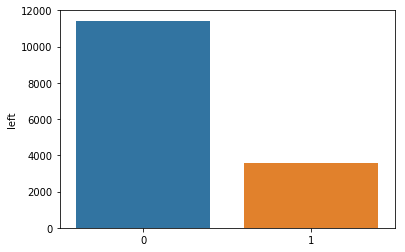

In [12]:
sn.barplot( hr_left_df.index, hr_left_df.left )

Summary of columns

In [13]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The summary statistics for Work_accident, left and promotion_last_5years does not make sense, 
as they are categorical variables.

How many people, who had work accidents, actually left the company?

/usr/local/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


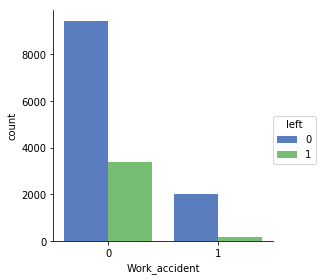

In [14]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")

In [15]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In terms of percentage

In [16]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

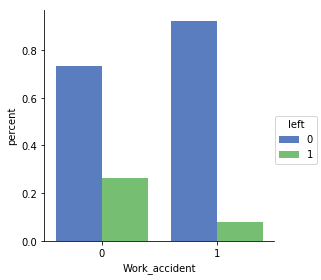

In [17]:
sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

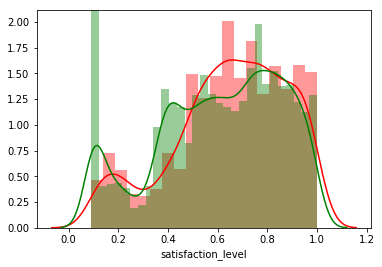

In [18]:
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

How satisfaction levels influence whether to stay or leave the company?

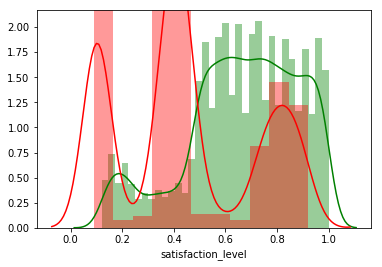

In [19]:
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

It can be noted, large number of people who had lower satisfaction levels, have left the company. Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

Average satisfaction levels for people who leave and stay back in the company

In [20]:
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479516

In [21]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

0.21709425554771716

In [22]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.44009801176140917

In [23]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.2638964784854295

Hypothesis Test: Does lower satisfaction levels lead to people leaving the company

H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying

H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying

In [24]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

The test establishes that the average satisfaction levels are different.

How last evaluation scores influencing whether to stay or leave the company?

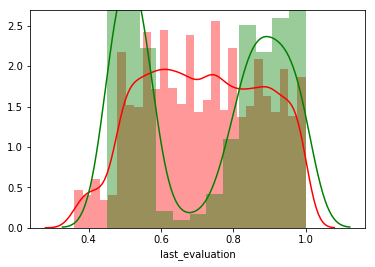

In [25]:
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back. That seems interesting

How time spent in company influences attrition?

In [26]:
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

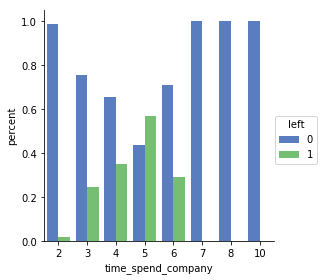

In [27]:
sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

Which department has maximum attrition?

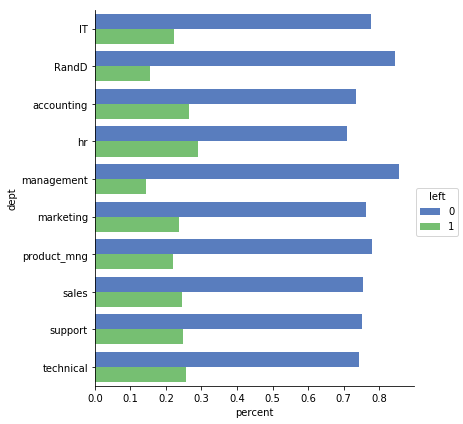

In [28]:
dept_count = hr_df[['sales', 'left']].groupby(['sales', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

Effect of whether someone got promoted in last 5 years

In [29]:
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


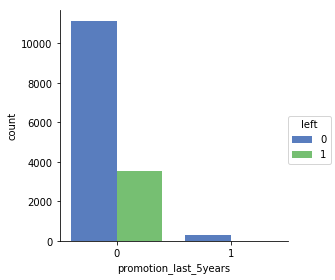

In [30]:
sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

How Salary is influencing attrition decisions?

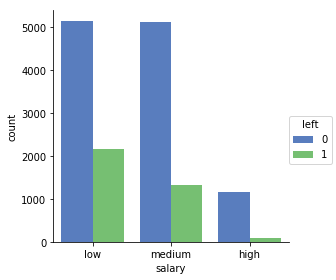

In [31]:
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Does higher salary lead to higher satisfaction level?

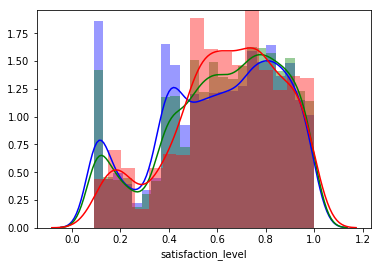

In [32]:
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

How salaries across departments are related to attrition?

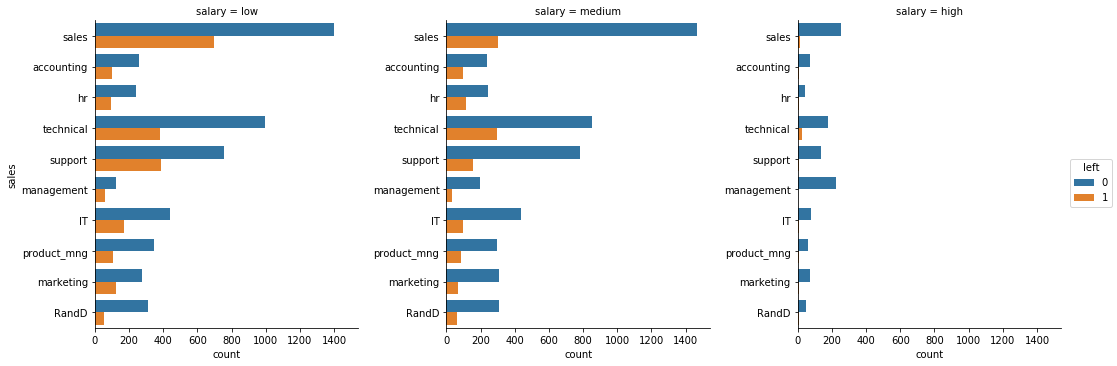

In [33]:
sn.factorplot( y = "sales",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

Lets check corrleation between Variables

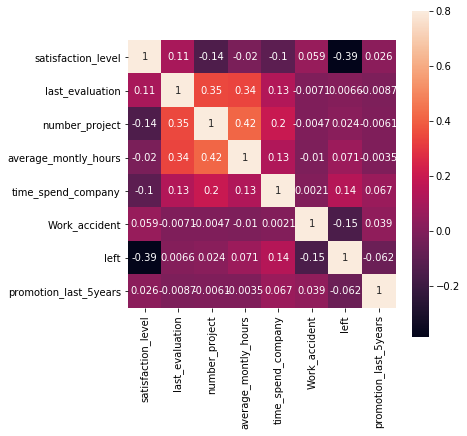

In [34]:
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

Some key observations:

Satisfaction level reduces as people spend more time in the company. 
Also, interestingly when they work on more number of projects.
Evaluation score is positively correlated with spending more montly hours and number of projects.
As satisfaction level reduces, people tend to leave company.

# Predict Attrition

Encoding Categorical Features

In [35]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

In [36]:
categorical_features = ['Work_accident','promotion_last_5years', 'sales', 'salary']

An utility function to create dummy variable

In [37]:
def create_dummies( df, colname ): 
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [38]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [39]:
hr_df[0:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


Splitting the dataset

In [40]:
feature_columns = hr_df.columns.difference( ['left'] )

In [41]:
feature_columns

Index([u'Work_accident_1', u'average_montly_hours', u'last_evaluation',
       u'number_project', u'promotion_last_5years_1', u'salary_low',
       u'salary_medium', u'sales_RandD', u'sales_accounting', u'sales_hr',
       u'sales_management', u'sales_marketing', u'sales_product_mng',
       u'sales_sales', u'sales_support', u'sales_technical',
       u'satisfaction_level', u'time_spend_company'],
      dtype='object')

In [42]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Building Models

Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622769753728),
 ('average_montly_hours', 0.0049756363245241275),
 ('last_evaluation', 0.59258558863804633),
 ('number_project', -0.30373347834325548),
 ('promotion_last_5years_1', -1.2172794684011867),
 ('salary_low', 1.8131727383534526),
 ('salary_medium', 1.3088620658644696),
 ('sales_RandD', -0.57076352319758017),
 ('sales_accounting', 0.093003111423075033),
 ('sales_hr', 0.35887723258751481),
 ('sales_management', -0.36238816117608885),
 ('sales_marketing', 0.13047436816857155),
 ('sales_product_mng', 0.023809245329872605),
 ('sales_sales', 0.075841819557018159),
 ('sales_support', 0.13493943775702524),
 ('sales_technical', 0.19545538608931851),
 ('satisfaction_level', -4.1082674682072104),
 ('time_spend_company', 0.26529829294095814)]

In [45]:
logreg.intercept_

array([-1.53003348])

Predicting the test cases

In [46]:
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [47]:
hr_test_pred = hr_test_pred.reset_index()

Comparing the predictions with actual test data

In [48]:
hr_test_pred.sample( n = 10 )

,index,actual,predicted
125,13531,0,0
49,12374,1,0
16,11874,0,0
890,14148,0,0
735,10296,0,0
1287,11105,0,0
1329,5970,0,0
1167,12266,1,1
598,9751,0,0
2898,6147,0,0


Creating a confusion matrix

In [49]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]])

In [50]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,u'Predicted label')

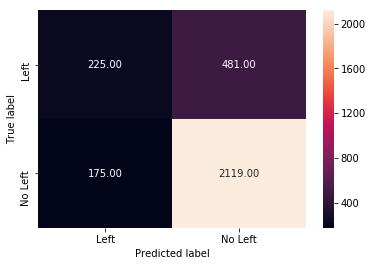

In [51]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Observation:
Overall test accuracy is 78%. But it is not a good measure. 
The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left.

The objective of the model is to indentify the people who will leave, so that the company can intervene and act.

This might be the case as the default model assumes people with more than 0.5 probability will not leave the company.

Predit Probability

In [53]:
test_X[:1]

,Work_accident_1,average_montly_hours,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level,time_spend_company
6723,1,226,0.96,5,0,0,1,0,0,0,0,1,0,0,0,0,0.65,2


In [54]:
logreg.predict_proba( test_X[:1] )

array([[ 0.97203473,  0.02796527]])

Note:
The model is predicting the probability of him leaving the company is only 0.027, which is very low.

How good the model is?

In [55]:
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [56]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [57]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [58]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

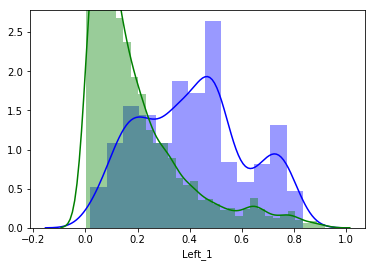

In [59]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

Finding the optimal cutoff probability

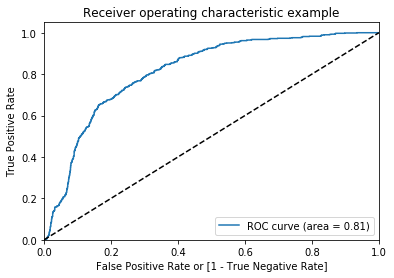

In [60]:
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [61]:
thresholds[0:10]

array([ 1.91905393,  0.91905393,  0.90057483,  0.88605884,  0.88001358,
        0.87933849,  0.87233291,  0.86974566,  0.86193265,  0.85880289])

In [62]:
fpr[0:10]

array([ 0.        ,  0.00087184,  0.00130776,  0.00174368,  0.0021796 ,
        0.00261552,  0.00305144,  0.00348736,  0.00392328,  0.0043592 ])

In [63]:
tpr[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [64]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [65]:
round( float( cutoff_prob ), 2 )

0.28

Predicting with new cut-off probability

In [66]:
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [67]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972035,0.027965,0
1,6473,0,0,0.917792,0.082208,0
2,4679,0,0,0.770442,0.229558,0
3,862,1,0,0.523038,0.476962,1
4,7286,0,0,0.975843,0.024157,0
5,8127,0,0,0.722851,0.277149,0
6,3017,0,0,0.985596,0.014404,0
7,3087,0,1,0.130254,0.869746,1
8,6425,0,0,0.769714,0.230286,0
9,2250,0,1,0.398617,0.601383,1


Text(0.5,15,u'Predicted label')

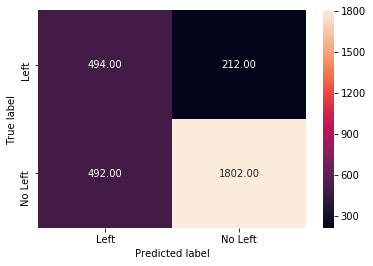

In [68]:
cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Building Decision Tree

In [69]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [70]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [71]:
tree.best_params_

{'max_depth': 8}

In [72]:
tree.best_score_

0.9802483540295025

Build Final Decision Tree Model

In [73]:
clf_tree = DecisionTreeClassifier( max_depth = 9 )
clf_tree.fit( train_X, train_y, )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Observation:

Wow! the accuracy is about 98%.

In [74]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [75]:
tree_test_pred.sample( n = 10 )

,actual,predicted
9534,0,0
12628,1,1
4237,0,0
1684,1,1
14888,1,1
13700,0,0
14762,1,1
14829,1,1
9581,0,0
7563,0,0


In [76]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.97799999999999998

Text(0.5,15,u'Predicted label')

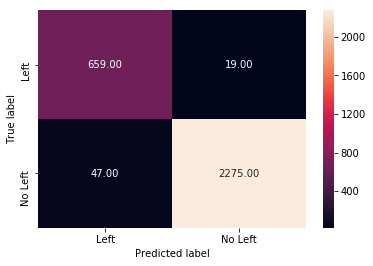

In [77]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Generate rules from the decision tree

# Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
radm_clf = RandomForestClassifier()
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [85]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.98666666666666669

Text(0.5,15,u'Predicted label')

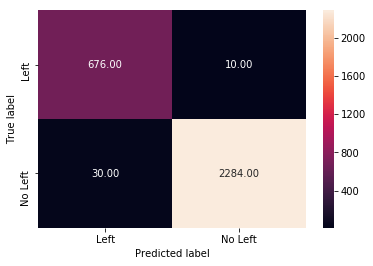

In [86]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Feature Importance from Random Forest Model

In [87]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [88]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

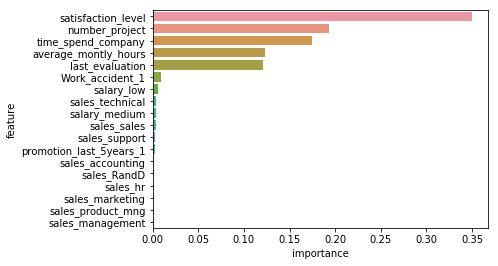

In [89]:
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

Note:

As per the model, the most important features which influence whether to leave the company,in descending order, are

satisfaction_level

number_project

time_spend_company

last_evaluation

average_montly_hours

work_accident